<a href="https://colab.research.google.com/github/alibekk93/PWM-for-Secondary-Structure/blob/v1/PWM_for_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PWM for SS

## Setup

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
#@markdown Choose how many types of SS you have

types_of_SS = 'Nucleotides' #@param ['3 types of SS', '8 types of SS', 'Nucleotides']

if types_of_SS == '3 types of SS':
  SS_TYPES = ['C', 'E', 'H']
elif types_of_SS == '8 types of SS':
  SS_TYPES = ['B', 'C', 'E', 'G', 'H', 'I', 'S', 'T']
elif types_of_SS == 'Nucleotides':
  SS_TYPES = ['A', 'C', 'G', 'T']

CHAR_TO_INDEX = {ss:i for i, ss in enumerate(SS_TYPES)}
INDEX_TO_CHAR = {i:ss for i, ss in enumerate(SS_TYPES)}

#@markdown Choose a pseudocount value
pseudocount = '1e-100' #@param {type:'string'}
pseudocount = float(pseudocount)

In [ ]:
seqs = ['ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA',
        'ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCGGGTTTGATGTGCTCGGGGCGGCGGTGACACCTGTTGATGGTGCATTGCTCGGAGATGTAGTCACGGTTGAGGCGGCAGAGACATTCAGTCTCAACAACCTCGGACGCTTTGCCGATAAGCTGCCGTCAGAACCACGGGAAAATATCGTTTATCAGTGCTGGGAGCGTTTTTGCCAGGAACTGGGTAAGCAAATTCCAGTGGCGATGACCCTGGAAAAGAATATGCCGATCGGTTCGGGCTTAGGCTCCAGTGCCTGTTCGGTGGTCGCGGCGCTGATGGCGATGAATGAACACTGCGGCAAGCCGCTTAATGACACTCGTTTGCTGGCTTTGATGGGCGAGCTGGAAGGCCGTATCTCCGGCAGCATTCATTACGACAACGTGGCACCGTGTTTTCTCGGTGGTATGCAGTTGATGATCGAAGAAAACGACATCATCAGCCAGCAAGTGCCAGGGTTTGATGAGTGGCTGTGGGTGCTGGCGTATCCGGGGATTAAAGTCTCGACGGCAGAAGCCAGGGCTATTTTACCGGCGCAGTATCGCCGCCAGGATTGCATTGCGCACGGGCGACATCTGGCAGGCTTCATTCACGCCTGCTATTCCCGTCAGCCTGAGCTTGCCGCGAAGCTGATGAAAGATGTTATCGCTGAACCCTACCGTGAACGGTTACTGCCAGGCTTCCGGCAGGCGCGGCAGGCGGTCGCGGAAATCGGCGCGGTAGCGAGCGGTATCTCCGGCTCCGGCCCGACCTTGTTCGCTCTGTGTGACAAGCCGGAAACCGCCCAGCGCGTTGCCGACTGGTTGGGTAAGAACTACCTGCAAAATCAGGAAGGTTTTGTTCATATTTGCCGGCTGGATACGGCGGGCGCACGAGTACTGGAAAACTAA',
        'GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCAGCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGATAATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACATTATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCATAAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA',
        'ATGCTGATTCTTATTTCACCTGCGAAAACGCTTGATTACCAAAGCCCGTTGACCACCACGCGCTATACGCTGCCGGAGCTGTTAGACAATTCCCAGCAGTTGATCCATGAGGCGCGGAAACTGACGCCTCCGCAGATTAGCACGCTGATGCGCATCAGCGACAAACTGGCGGGTATCAACGCCGCTCGCTTTCATGACTGGCAGCCAGATTTCACGCCGGCGAATGCCCGCCAGGCGATTCTGGCGTTTAAAGGTGATGTCTACACCGGCTTGCAGGCCGAAACCTTCAGCGAAGACGATTTCGATTTTGCCCAACAGCATTTGCGAATGCTTTCCGGCTTGTATGGCGTACTCCGCCCGCTCGATTTAATGCAGCCTTATCGTCTGGAAATGGGGATCCGTCTTGAGAATGCCCGAGGGAAAGATCTGTATCAATTCTGGGGAGATATCATCACCAACAAGCTGAACGAGGCGCTCGCAGCACAAGGCGATAATGTGGTGATTAATCTGGCGTCAGATGAGTATTTTAAATCGGTGAAGCCGAAGAAATTGAATGCCGAGATTATCAAGCCGGTGTTCCTCGATGAGAAGAACGGCAAATTTAAGATCATCAGCTTCTACGCTAAGAAAGCACGCGGTCTGATGAGTCGTTTCATTATTGAAAATCGGCTGACCAAACCAGAGCAACTGACTGGTTTTAATAGCGAAGGTTACTTCTTTGATGAAGATTCCTCCAGCAATGGCGAACTGGTGTTTAAACGCTACGAGCAGCGTTAA',
        'ATGAATACTTTACGTATTGGCTTAGTTTCCATCTCTGATCGCGCATCCAGCGGCGTTTATCAGGATAAAGGCATCCCTGCGCTGGAAGAATGGCTGACATCGGCGCTAACCACGCCGTTTGAACTGGAAACCCGCTTAATCCCCGATGAGCAGGCGATCATCGAGCAAACGTTGTGTGAGCTGGTGGATGAAATGAGTTGCCATCTGGTGCTCACCACGGGCGGAACTGGCCCGGCGCGTCGTGACGTAACGCCCGATGCGACGCTGGCAGTAGCGGACCGCGAGATGCCTGGCTTTGGTGAACAGATGCGCCAGATCAGCCTGCATTTTGTACCAACTGCGATCCTTTCGCGTCAGGTGGGCGTGATTCGCAAACAGGCGCTGATCCTTAACTTACCCGGTCAGCCGAAGTCTATTAAAGAGACGCTGGAAGGTGTGAAGGACGCTGAGGGTAACGTTGTGGTACACGGTATTTTTGCCAGCGTACCGTACTGCATTCAGTTGCTGGAAGGGCCATACGTTGAAACGGCACCGGAAGTGGTTGCAGCATTCAGACCGAAGAGTGCAAGACGCGACGTTAGCGAATAA',
        'ATGGGCAACACTAAGTTGGCTAATCCGGCACCGCTGGGCCTGATGGGCTTCGGCATGACCACCATTCTGCTTAACCTGCACAACGTGGGTTATTTCGCTCTGGACGGTATTATTCTTGCCATGGGCATTTTCTACGGCGGCATCGCGCAAATTTTTGCTGGTCTGCTGGAGTACAAAAAAGGCAACACTTTCGGTTTAACCGCATTCACCTCTTACGGTTCTTTCTGGCTGACGCTGGTTGCGATTCTGCTGATGCCGAAACTGGGTCTGACCGATGCGCCAAATGCACAGTTCCTTGGTGTCTACCTGGGTCTGTGGGGCGTATTTACGCTGTTTATGTTCTTCGGCACGCTGAAAGGCGCACGCGTTCTGCAATTCGTTTTCTTTAGCCTGACCGTGCTGTTTGCCCTGCTGGCGATCGGTAACATTGCCGGTAACGCCGCAATCATCCACTTTGCCGGCTGGATTGGGCTGATCTGCGGTGCCAGCGCAATCTATCTGGCGATGGGTGAAGTACTGAACGAGCAGTTTGGTCGCACCGTTCTGCCGATTGGTGAATCCCACTAA',
        'ATGAAATCCGTTTTTACGATTTCCGCCAGCCTGGCGATTAGCCTGATGCTGTGCTGCACGGCGCAGGCAAACGACCATAAACTCCTCGGCGCCATTGCAATGCCGCGTAACGAAACCAACGATCTGGCGCTGAAACTTCCTGTTTGTCGCATTGTGAAACGCATACAACTCTCTGCCGACCATGGCGATTTACAGTTAAGCGGTGCATCGGTTTATTTCAAAGCCGCCCGTAGCGCCAGTCAGAGCCTGAATATTCCTTCAGAAATAAAAGAAGGGCAAACCACTGACTGGATCAACATTAACAGCGATAACGACAATAAACGCTGCGTCTCAAAAATCACCTTTTCGGGTCATACGGTGAACTCATCGGATATGGCCACGCTGAAAATTATCGGCGACGACTAA',
        'ATGAAGCAGCATAAGGCGATGATTGTCGCCCTGATCGTCATCTGTATCACCGCCGTAGTGGCGGCGCTGGTAACGAGAAAAGACCTCTGTGAGGTTCACATCCGAACTGGCCAGACGGAGGTTGCTGTTTTCACGGCTTACGAATCCGAGTAA']

In [ ]:
def calc_pwm(seqs=seqs, pseudocount=pseudocount, SS_TYPES=SS_TYPES):
  all_seqs = ''.join(seqs)
  background_freqs = [all_seqs.count(ss)/len(all_seqs) for ss in SS_TYPES]
  counts = np.zeros((len(seqs[0]), len(SS_TYPES)))
  for seq in seqs:
      for i, char in enumerate(seq):
          index = CHAR_TO_INDEX[char]
          counts[i, index] += 1
  counts = counts + pseudocount
  pwm = np.zeros_like(counts)
  for i in range(len(SS_TYPES)):
      pwm[:, i] = np.log(counts[:, i]/sum(counts[:, i])/background_freqs[i])
  
  return pwm

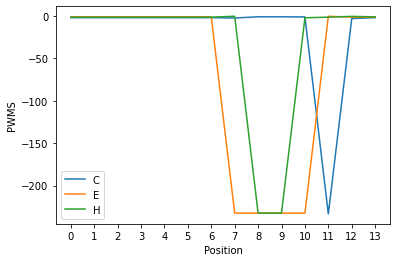

In [ ]:
pwm = calc_pwm()

fig, ax = plt.subplots()
for i in range(len(SS_TYPES)):
    ax.plot(pwm[:, i], label=SS_TYPES[i])
ax.set_xlabel('Position')
ax.set_ylabel('PWMS')
ax.set_xticks(np.arange(len(seqs[0])))
ax.set_xticklabels(np.arange(len(seqs[0])))
ax.legend()
plt.show()

In [ ]:
### GIBBS SAMPLER

# Define the initial state
current_state = np.random.randint(0, len(seqs))

# Define the number of iterations
num_iterations = 100

for i in range(num_iterations):
    # Sample a new state
    new_state = np.random.randint(0, len(seqs))
    while new_state == current_state:
        new_state = np.random.randint(0, len(seqs))
    current_state = new_state